In [62]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft
import SaveData

In [66]:
# Reads files and generates pickled objects to use later
N = 256
filepath = "AbacusSummit_c000_LRG_z0.5.txt"
#window = SaveData.makeWindow(N, np.pi/8, N/8)
x_dat, y_dat, z_dat = SaveData.readFile(filepath)

In [60]:
# Opens already pickled data
windowPath = "window_" + str(N)
with open(windowPath, 'rb') as inp:
    window = pickle.load(inp)
xpath = "x_data"
with open(xpath, 'rb') as inp1:
    x_dat = pickle.load(inp1)
ypath = "y_data"
with open(ypath, 'rb') as inp2:
    y_dat = pickle.load(inp2)
zpath = "z_data"
with open(zpath, 'rb') as inp3:
    z_dat = pickle.load(inp3)

FileNotFoundError: [Errno 2] No such file or directory: 'y_data'

In [ ]:
def grid(N, x, y, z):
    counts = np.zeros((N, N, N))
    start = min(min(x), min(y), min(z))
    end = max(max(x), max(y), max(z))
    binsize = (end - start)/(N-1)
    for i in range(len(x)):
        x_bin = int(x[i]/binsize)  
        y_bin = int(y[i]/binsize) 
        z_bin = int(z[i]/binsize)
        counts[x_bin, y_bin, z_bin] += 1
    return counts

In [ ]:
def grid_ft(grid):
    return np.fft.fft(grid)

In [ ]:
def power_spectrum(grid, Nbins, L, dk):
    Pk = np.zeros(Nbins)
    Nk = np.zeros(Nbins)
    Nx, Ny, Nz = grid.shape
    kz = np.fft.fftfreq(Nz, L)
    for ix in range(Nx):
        for iy in range(Ny):
            for iz in range(Nz):
                k = np.sqrt(grid[ix,iy, iz]**2 + grid[ix,iy,iz]**2 + grid[ix,iy,iz]**2)
                mu = kz[iz]/k
                bin = int(k/dk)
                if (bin > Nbins-1):
                    continue
                Nk[bin] += 1
                Pk[bin] += np.abs(grid[ix, iy, iz])**2
    return Pk/Nk*L**3/Nz**6

In [ ]:
counts = grid(N, x_dat, y_dat, z_dat)
kcounts = grid_ft(counts)
P = power_spectrum(kcounts, 21, 2000, .1)
Pwin = power_spectrum(kcounts*window, 21, 2000, .1)

C:\Users\kales\AppData\Local\Temp\ipykernel_17212\2402943547.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  bin = int(k/dk)
C:\Users\kales\AppData\Local\Temp\ipykernel_17212\2402943547.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  mu = kz[iz]/k
C:\Users\kales\AppData\Local\Temp\ipykernel_17212\2402943547.py:10: RuntimeWarning: invalid value encountered in scalar divide
  mu = kz[iz]/k


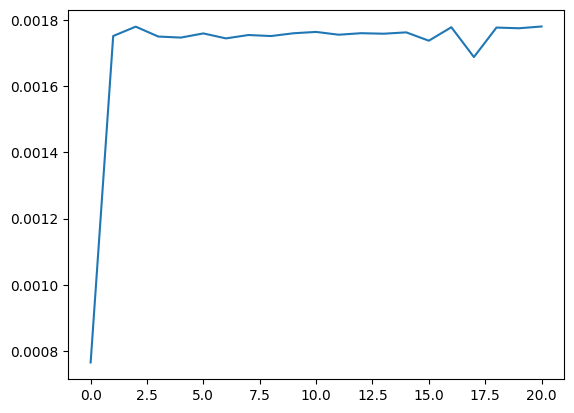

In [ ]:
plt.plot(P)
plt.ploy(Pwin)